In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
index_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Image Detection\index_image_to_landmark.csv")
landmark_df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Image Detection\landmark_id_dictionary.csv")

In [5]:
index_df.head()

,id,landmark_id
0,fdf40612109ad174,32888
1,5a6cc67c893daea6,552
2,87b88acb68cdc1f1,13626
3,c4ac217ce087b251,8699
4,05f269bf32be9d3e,30838


In [6]:
landmark_df.head()

,ID,Landmark
0,40333,Eiffel Tower
1,43757,Great Pyramid of Giza
2,43267,Brandenburg Gate
3,57570,Lion Island (New South Wales)
4,30675,Stonehenge


In [10]:
id_list = landmark_df['ID'].tolist()   # Getting a list of ID's that we will look for
print(id_list)

[40333, 43757, 43267, 57570, 30675, 24996, 73248, 83439, 13542, 58504, 85575, 48268, 10924, 43412, 77972, 44418, 14790, 83923, 80307, 82091, 39351, 38652, 34274, 71671, 64537, 91294, 33271, 72649, 85433, 77887, 31913, 65436, 108502]


In [16]:
filtered_df = index_df.loc[index_df['landmark_id'].isin(id_list)]   # Taking only images that we are interested in
filtered_df['landmark_id'].unique()    # There are some values in id_list that aren't here. 

array([43412, 39351, 38652, 64537, 72649, 65436, 80307, 58504, 30675,
       40333, 48268, 44418, 33271, 14790, 82091, 83439, 13542, 10924,
       91294, 24996, 85575, 43757, 77972, 85433, 73248, 77887, 43267,
       34274, 57570, 83923, 31913, 71671], dtype=int64)

In [17]:
print(len(filtered_df))    # We have 909 values to train our model.

909


In [22]:
merged_df = filtered_df.merge(landmark_df, left_on='landmark_id', right_on='ID', how='left')   # Finalizin
merged_df = merged_df.drop(columns=['ID'])
merged_df.head()

,id,landmark_id,Landmark
0,9bc1d25ff3afa8af,43412,Golden Gate Bridge
1,8d9ebf1e1c05cb42,39351,The Rotunda
2,14eb43d406fbefbf,39351,The Rotunda
3,6180b3f33195d353,38652,Lincoln Financial Field
4,3ccfd45e321f6b26,64537,Monticello


<Axes: title={'center': 'Counts of each Landmark'}, xlabel='Landmark', ylabel='Count'>

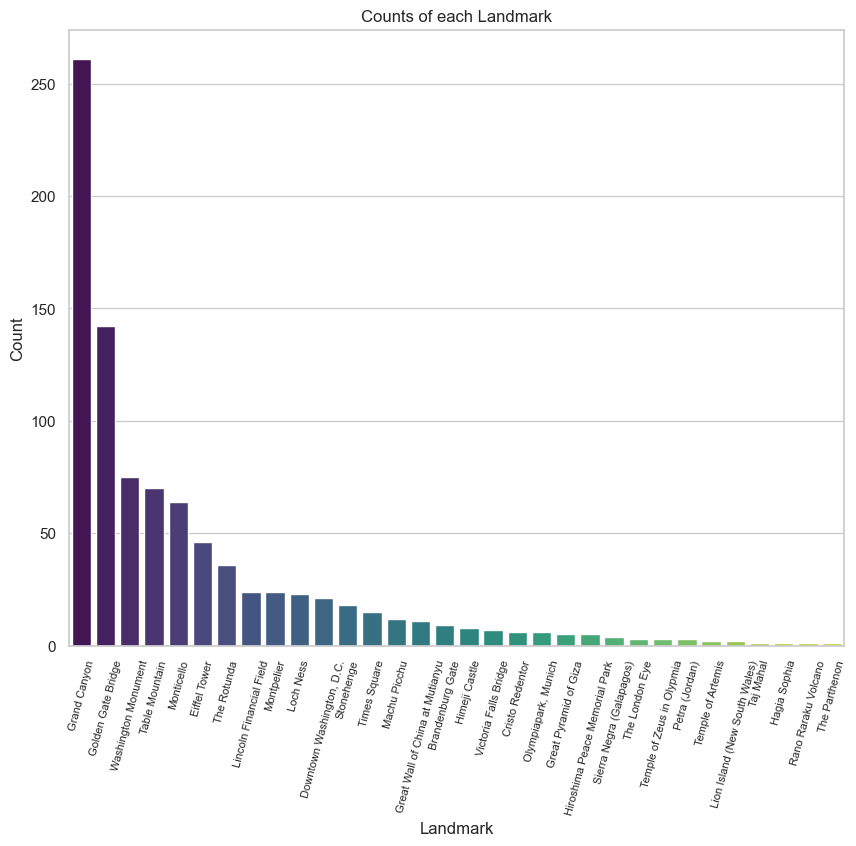

In [31]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="whitegrid")
plt.xticks(fontsize = 8, rotation=75)
plt.title("Counts of each Landmark")
landmark_counts = merged_df['Landmark'].value_counts().reset_index()
landmark_counts.columns = ['Landmark', 'Count']

sns.barplot(x='Landmark', y='Count', data=landmark_counts, palette='viridis')

In [33]:
merged_df.to_csv('select_landmarks.csv')